In [ ]:
# @title Linear Regression


In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
data_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [70]:
data_train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


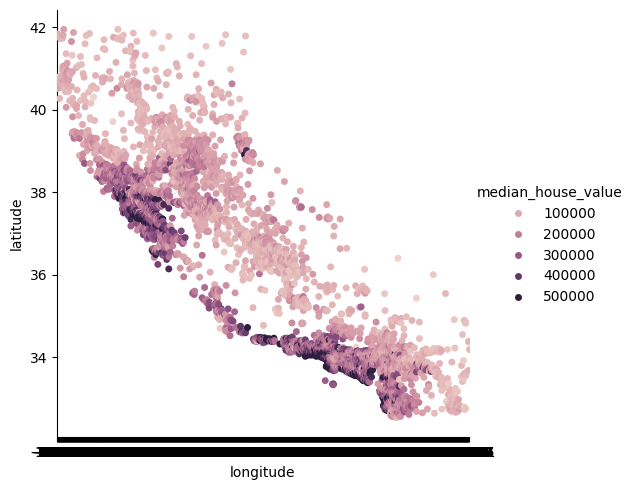

In [73]:
sns.catplot(data=data_train, x='longitude' , y='latitude', hue='median_house_value')

In [4]:
x_train = data_train.drop(columns = ['median_house_value'])
y_train = data_train['median_house_value']
x_test = data_test.drop(columns = ['median_house_value'])
y_test = data_test['median_house_value']

In [5]:
from  sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [6]:
linear_model

LinearRegression()

In [7]:
linear_model.fit(x_train,y_train)


LinearRegression()

In [8]:
linear_model.score(x_train,y_train)

0.6413378529502687

In [9]:
linear_model.score(x_test,y_test)

0.6195057678312047

In [10]:
linear_model.coef_

array([-4.31396373e+04, -4.29256731e+04,  1.15069493e+03, -8.37825121e+00,
        1.17648543e+02, -3.84887721e+01,  4.54360026e+01,  4.05070684e+04])

In [11]:
#Polynomial model
from sklearn.preprocessing import PolynomialFeatures
x_poly = PolynomialFeatures(degree=2) #so when we increase the degree, the overfit occurs to solve that we have to use regularization
x_added_features = x_poly.fit_transform(x_train)

In [12]:
linear_model.fit(x_added_features,y_train)

LinearRegression()

In [13]:
linear_model.score(x_added_features,y_train)

0.7066368555247645

In [14]:
linear_model.score(x_poly.fit_transform(x_test),y_test)

0.6645927987055097

In [15]:
linear_model.coef_

array([ 8.30575943e-02,  6.33924149e+05,  9.25858755e+05, -7.93261090e+04,
        1.09217692e+03, -4.86728867e+03,  1.36116605e+02, -1.12328493e+03,
       -9.75242137e+05,  4.27397922e+03,  1.14129725e+04, -9.72991445e+02,
        1.42813842e+01, -6.94463653e+01,  1.76214927e+00, -8.15242502e+00,
       -1.26310130e+04,  6.46760812e+03, -1.06552126e+03,  1.55005045e+01,
       -8.49510751e+01,  3.06285668e+00, -2.42342570e+00, -1.33190205e+04,
        1.97160931e+01, -7.00788821e-02,  1.76336148e+00, -1.81775335e+00,
        4.67158334e+00,  7.90170022e+01, -2.49108023e-03,  3.83722617e-02,
       -2.33684643e-03,  3.91870646e-04,  1.03989864e+01, -1.77759354e-01,
        2.10569960e-02,  3.41746881e-02, -5.00677798e+01,  1.47713478e-03,
       -1.74799807e-02, -1.15663829e+01,  2.65450436e-02,  3.44397063e+01,
       -2.59846600e+03])

In [16]:
#Regularization

In [17]:
from sklearn.linear_model import Ridge

In [18]:
ridge_model = Ridge(alpha=100)

In [19]:
ridge_model

Ridge(alpha=100)

In [20]:
data_bb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/baseball.csv')

In [21]:
data_bb.head()

,player,salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,...,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
0,-Alan Ashby,-0.135055,-0.601753,-0.594542,-0.527545,-1.203816,-0.521069,-0.097342,1.395233,0.346131,...,-0.002914,-0.121439,0.258473,0.434506,1.056743,0.979299,1.219174,-0.522196,0.212946,1.073007
1,-Alvin Davis,-0.123972,0.511566,0.491323,0.728577,0.440675,0.792549,1.606310,-0.899485,-0.452004,...,-0.075909,-0.414315,-0.199211,0.010353,-0.942706,0.979299,2.105095,-0.253380,0.818404,-0.928417
2,-Andre Dawson,-0.079637,0.626971,0.735088,0.956963,0.401520,1.024364,-0.189431,0.769401,1.299081,...,1.894952,1.409364,1.569674,0.354977,1.056743,-1.017256,-0.324044,-0.742763,-0.846605,1.073007
3,-Andres Galarraga,-0.985164,-0.561022,-0.461579,-0.184967,-0.616498,-0.366526,-0.511743,-1.108096,-0.989050,...,-0.696365,-0.945718,-0.879551,-0.860675,1.056743,-1.017256,1.837176,-0.542874,-0.695240,1.073007
4,-Alfredo Griffin,0.474541,1.292248,1.355583,-0.870124,0.753911,-0.018804,-0.281520,0.769401,0.765534,...,-0.611205,0.422041,0.017261,-0.250955,-0.942706,0.979299,-0.031118,2.083253,2.483412,-0.928417


In [22]:
x = data_bb.drop(columns=['player','salary'])
y = data_bb['salary']

In [23]:
linear_model1 =LinearRegression()

In [24]:
x,y

(        AtBat      Hits     HmRun      Runs       RBI     Walks     Years  \
 0   -0.601753 -0.594542 -0.527545 -1.203816 -0.521069 -0.097342  1.395233   
 1    0.511566  0.491323  0.728577  0.440675  0.792549  1.606310 -0.899485   
 2    0.626971  0.735088  0.956963  0.401520  1.024364 -0.189431  0.769401   
 3   -0.561022 -0.461579 -0.184967 -0.616498 -0.366526 -0.511743 -1.108096   
 4    1.292248  1.355583 -0.870124  0.753911 -0.018804 -0.281520  0.769401   
 ..        ...       ...       ...       ...       ...       ...       ...   
 258  0.633760  0.424841 -0.527545  0.401520 -0.134711 -0.189431 -0.482264   
 259  0.599817  0.624286 -0.755931  0.832220 -0.057440  2.435113  0.978012   
 260  0.484412  0.402681 -0.984317  0.244902 -0.327890  0.501239 -0.273653   
 261  1.149689  0.801570 -0.299159  1.184611  0.328919  1.698399  0.143569   
 262  1.543424  1.377743 -0.299159  0.871375 -0.289255 -0.465699  0.769401   
 
        CAtBat     CHits    CHmRun     CRuns      CRBI    CWal

In [25]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2)

In [27]:
x_train.shape,x_test.shape

((210, 19), (53, 19))

In [28]:
linear_model1.fit(x_train,y_train)


LinearRegression()

In [29]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=100)

In [30]:
ridge_model.coef_

array([ 0.02111128,  0.11149763,  0.00583963,  0.06415231,  0.06679353,
        0.11450991,  0.01261644,  0.06344572,  0.09938376,  0.08703729,
        0.09348823,  0.11225602,  0.01015594,  0.02864942, -0.09183682,
        0.12770008, -0.0090596 , -0.00788767,  0.0008971 ])

In [31]:
ridge_model.intercept_

0.0021971155932826933

In [32]:
# @title Lasso Regression


In [33]:
from sklearn.linear_model import Lasso

In [34]:
lasso_model = Lasso(alpha=0.3)

In [35]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.3)

In [36]:
lasso_model.coef_

array([ 0.        ,  0.10245765,  0.        ,  0.        ,  0.        ,
        0.07391011,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.28345178,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ])

In [37]:
print(f"Score in Training dataset linear regression {linear_model1.score(x_train,y_train) } \t Score in Testing dataset linear regression {linear_model1.score(x_test,y_test) } ")
print(f"Score in Training dataset Ridge regression {ridge_model.score(x_train,y_train) } \t Score in Testing dataset Ridge regression {ridge_model.score(x_test,y_test) } ")
print(f"Score in Training dataset Lasso regression {lasso_model.score(x_train,y_train) } \t Score in Testing dataset Lasso regression {lasso_model.score(x_test,y_test) } ")

Score in Training dataset linear regression 0.6259578651031934 	 Score in Testing dataset linear regression -0.023332623913311368 
Score in Training dataset Ridge regression 0.5552593046797701 	 Score in Testing dataset Ridge regression -0.0135980860422098 
Score in Training dataset Lasso regression 0.37879445705308123 	 Score in Testing dataset Lasso regression 0.1376273652396076 


In [38]:
print(f"coefficient of linear_model is {linear_model1.coef_ }")
print('\n')
print(f"coefficient of Ridge_model is {ridge_model.coef_ }")
print('\n')
print(f"coefficient of Lasso_model is {lasso_model.coef_ }")

coefficient of linear_model is [-0.69193425  0.84170134  0.10167841 -0.18738042 -0.07171824  0.3963433
 -0.05016442 -0.22918473 -0.54186519 -0.19430444  1.19476856  0.88760307
 -0.63839402  0.05227244 -0.13109197  0.16573439  0.03630909  0.00837985
 -0.0209899 ]


coefficient of Ridge_model is [ 0.02111128  0.11149763  0.00583963  0.06415231  0.06679353  0.11450991
  0.01261644  0.06344572  0.09938376  0.08703729  0.09348823  0.11225602
  0.01015594  0.02864942 -0.09183682  0.12770008 -0.0090596  -0.00788767
  0.0008971 ]


coefficient of Lasso_model is [ 0.          0.10245765  0.          0.          0.          0.07391011
  0.          0.          0.          0.          0.          0.28345178
  0.          0.         -0.          0.         -0.          0.
  0.        ]


In [60]:
from sklearn.linear_model import ElasticNet

In [61]:
elastic_model = ElasticNet(alpha=0.1)

In [62]:
elastic_model.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [63]:
elastic_model.score(x_train, y_train)

0.48097202133411643

In [64]:
elastic_model.score(x_test,y_test)

0.46001065385285755

In [65]:
elastic_model.coef_

array([ 0.        ,  0.19663332,  0.        ,  0.        ,  0.        ,
        0.09548702, -0.        ,  0.        ,  0.08125984,  0.04609146,
        0.13281604,  0.15695203,  0.        ,  0.00773974, -0.10166951,
        0.14566529,  0.        , -0.        ,  0.        ])